# Winwin, graded challenge I

# Import module

In [1]:
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import & Sort Data

In [2]:
df = pd.read_csv('rideshare_kaggle.csv', parse_dates=True)

In [3]:
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
id                             693071 non-null object
timestamp                      693071 non-null float64
hour                           693071 non-null int64
day                            693071 non-null int64
month                          693071 non-null int64
datetime                       693071 non-null object
timezone                       693071 non-null object
source                         693071 non-null object
destination                    693071 non-null object
cab_type                       693071 non-null object
product_id                     693071 non-null object
name                           693071 non-null object
price                          637976 non-null float64
distance                       693071 non-null float64
surge_multiplier               693071 non-null float64
latitude                       693071 non-null float64
longitude              

# Preprocessing data

Removing the features(id,timestamps, textual summary) that predictand(price) has no dependency. As we already have distance,datetime parameters - (hour,day,month) removing latitude,longitude and datetime also from dataframe.

In [5]:
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude'],axis = 1)
print(df.shape)
df.head()

(693071, 40)


,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [6]:
df_new = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
df_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


Checking the correlation between Price and Temperature related features

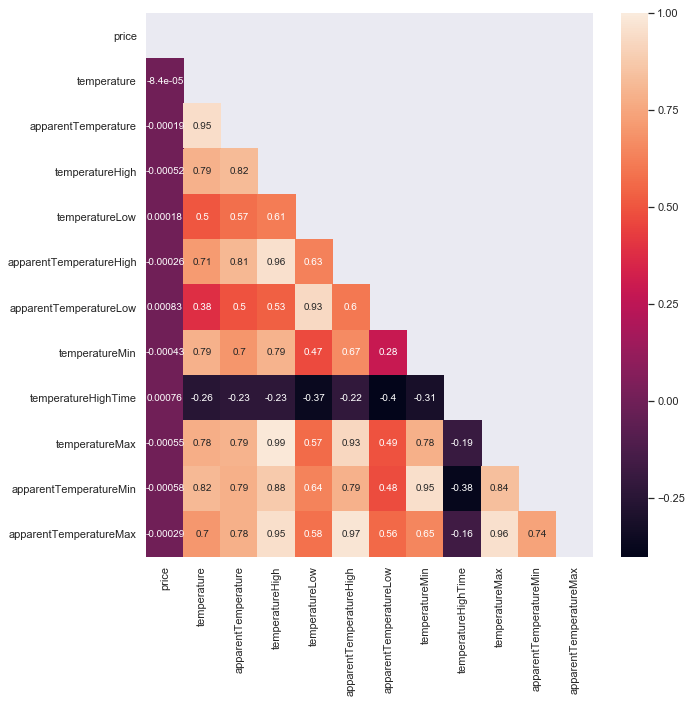

In [7]:
plt.figure(figsize=(10,10))
sb.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

Removing all the temperature related features from the dataframe as they have very weak correlation with the predictand(price)

In [8]:
df_new = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

df = df.drop(df_new.columns,axis=1)
df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


Analyzing data in the categorical features

In [9]:
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
df_new = df[cat_col]
df_new.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


Checking for unique values in all categorical columns

In [10]:
for col in df_new:
    print(f'{col} : {df_new[col].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

In [11]:
df_new['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_plus                               51235
lyft                                    51235
lyft_premier                            51235
lyft_luxsuv                             51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Removing timezone column as it has only value across all the observations and productid as it has more than 50% of the values with junk data

In [12]:
df = df.drop(['product_id','timezone'],axis=1)
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [13]:
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
df_new = df[num_col]
df_new.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

Analyzing climate related features with price column

In [14]:
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
df_new = df[cli_col]
df_new.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


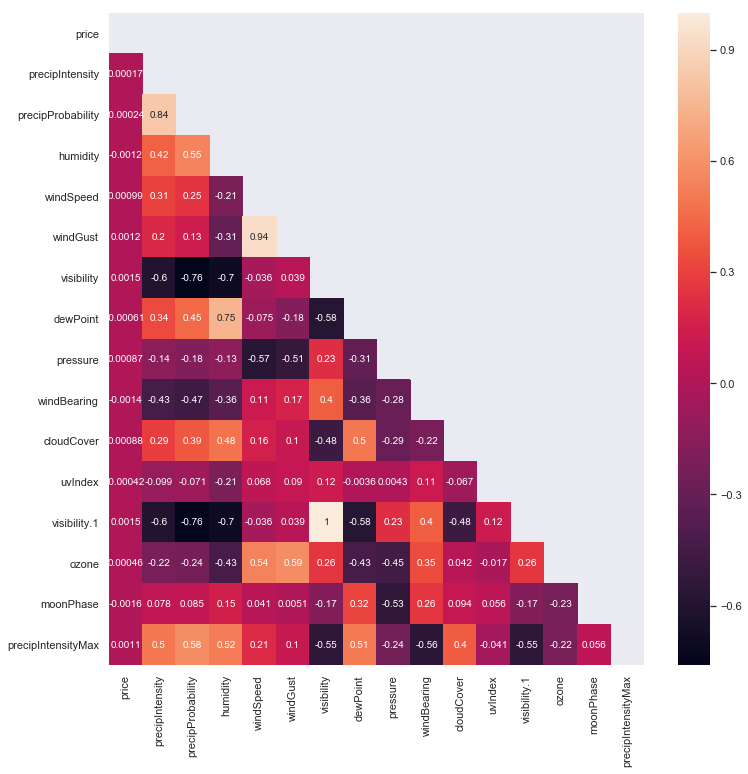

In [15]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

All the climate related features has correlation almost 0 with respect to price column. Dropping these columns does'nt effect the accurracy prediction of price

In [16]:
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
df = df.drop(cli_col,axis=1)
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [17]:
df.shape

(693071, 12)

Encoding all the category columns with the Onehot Encoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [19]:
df.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool',

In [20]:
df.head()

,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Analyzing source column values with price

In [21]:
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
df_new = df[src_col]
df_new.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Analyzing remaining columns with Price

In [22]:
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
df_new = df[rem_cols]
df_new.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9,16,12,0.44,1.0,1.0,0.0
1,11.0,2,27,11,0.44,1.0,1.0,0.0
2,7.0,1,28,11,0.44,1.0,1.0,0.0
3,26.0,4,30,11,0.44,1.0,1.0,0.0
4,9.0,3,29,11,0.44,1.0,1.0,0.0


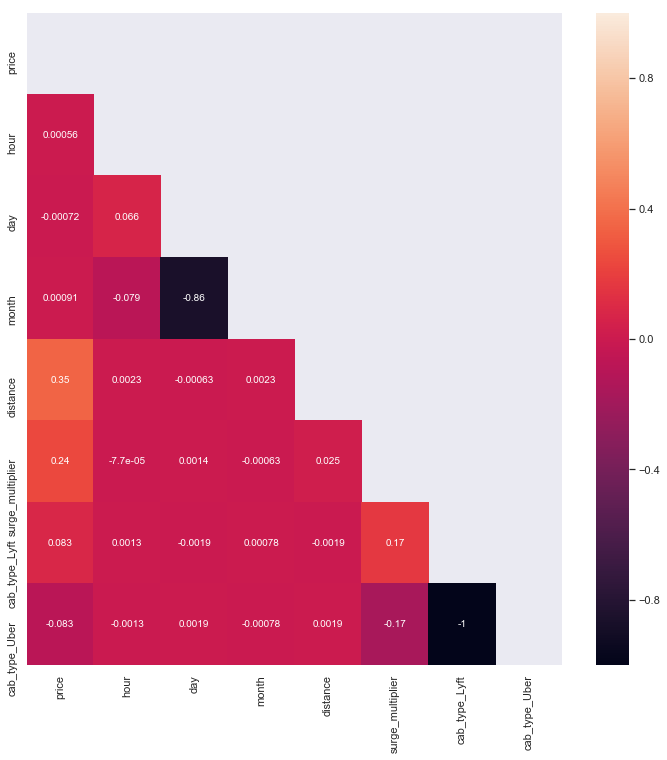

In [23]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

From above heatmap, month day, hour,cabtype_Uber & cab_type_Lyft are weakly correlated, but distance and surge_multiplier has good correlation with Price . So dropping month,day & hour.

# Data Process Use Linear Regression

I use a linear model because the data used is not normally distributed

In [24]:
column_names = ['distance','surge_multiplier']
X = df_new[column_names]
y = df_new['price']
y = y.replace(np.nan, regex=True)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

In [26]:
X_val.shape

(138615, 2)

In [27]:
X_train.shape

(554456, 2)

In [28]:
y_val.shape

(138615,)

In [29]:
y_train.shape

(554456,)

Scalling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

In [31]:
X_train_trf

array([[ 1.08020734, -0.15115437],
       [ 0.85196019, -0.15115437],
       [-1.51829876, -0.15115437],
       ...,
       [ 0.83440271, -0.15115437],
       [ 0.25500608, -0.15115437],
       [ 0.67638545, -0.15115437]])

Model used

In [32]:
from sklearn.linear_model import LinearRegression
# Drop any rows with null values
#df_neww.dropna(axis=0, how='any', inplace=True)

#column_names = ['distance', 'surge_multiplier']
#X_train_trf = df_new[column_names]
#y_train = df_new['price']

model = LinearRegression(fit_intercept=True)
model.fit(X_train_trf, y_train)


#X_val_trf = scaler.transform(X_val)
#df_new['predicted'] = model.predict(X_val_trf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
X_val_trf = scaler.transform(X_val)

In [34]:
X_val_trf

array([[-0.78088487, -0.15115437],
       [-0.73699118, -0.15115437],
       [-0.95645961, -0.15115437],
       ...,
       [ 0.17599745, -0.15115437],
       [-1.06180445, -0.15115437],
       [-0.64920382, -0.15115437]])

In [35]:
y_pred = model.predict(X_val_trf)

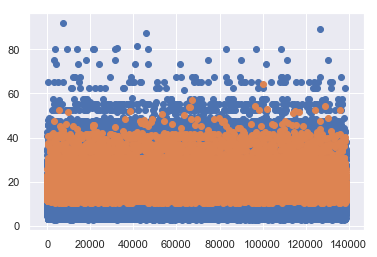

In [36]:
plt.scatter(list(range(len(y_val))),y_val)
plt.scatter(list(range(len(y_pred))),y_pred)


In [37]:
model.score(X_val,y_val)

-0.8164541849224343

In [38]:
model.score(X_train,y_train)

-0.7984693847057683

Model still Fit

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score = r2_score(y_val, y_pred)
print(f'R2_score : {R2_score * 100:.2f}%')

MAE = mean_absolute_error(y_val, y_pred)
print(f'MAE : {MAE:.2f}%')

MSE = mean_squared_error(y_val, y_pred)
print(f'MSE : {MSE:.2f}%')

RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE : {RMSE:.2f}%')

np.sqrt(np.mean((np.power(y_val, y_pred))))

R2_score : 16.21%
MAE : 6.94%
MSE : 71.50%
RMSE : 8.46%


1.4163528219898664e+47

In [40]:
params = pd.Series(model.coef_, index=X.columns)
params

distance            3.105967
surge_multiplier    2.082678
dtype: float64

From the scatter graph, the predict results already have a shape trend and resemble the results from the valid data. It is found that the correlation with price, the greater the distance and surge_multiplier, the higher the price values. The MAE and RMSE values were 6.94% and 8.46%, respectively. The RMSE value obtained is 71.5%, which is quite a large value so I decided to use another feature.

# Another Model

Analyzing name related features with price column

In [41]:
name_cols =['price','name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV']
df_news = df[name_cols]
df_news.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


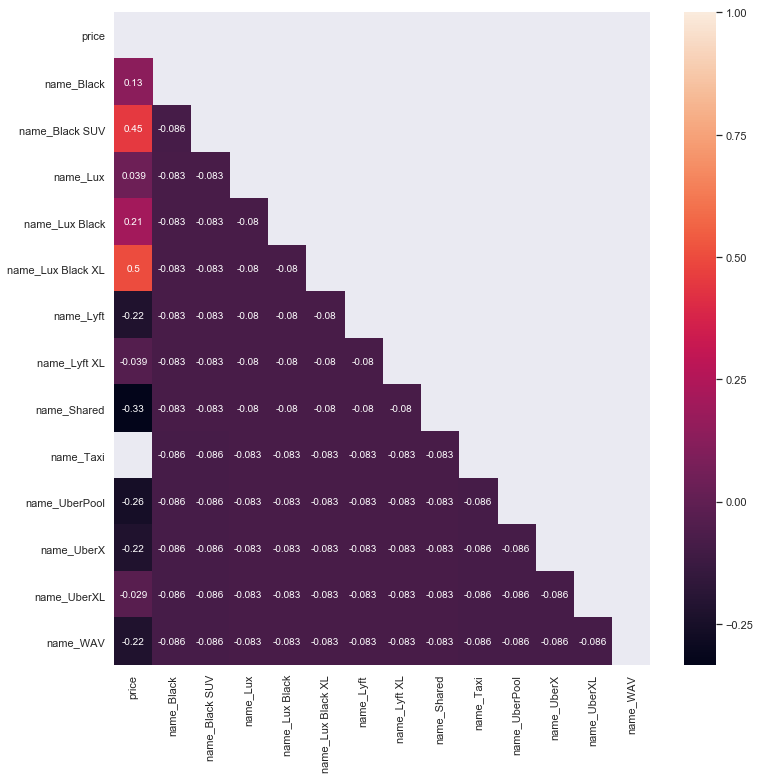

In [42]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(df_news.corr(),annot=True, mask=np.triu(df_news.corr()))

From the heatmap graph, the name feature can be used

In [43]:
column_names = ['name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV']
X = df_news[column_names]
y = df_news['price']
X = X.replace(np.nan, regex=True)
y = y.replace(np.nan, regex=True)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

Scalling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

Model Used

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train_trf, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
X_val_trf = scaler.transform(X_val)
y_pred1 = model.predict(X_val_trf)

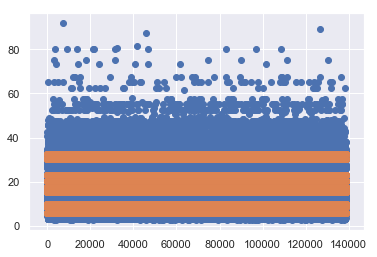

In [49]:
plt.scatter(list(range(len(y_val))),y_val)
plt.scatter(list(range(len(y_pred1))),y_pred1)

In [50]:
model.score(X_val,y_val)

-4.726720769646232e+18

In [51]:
model.score(X_train,y_train)

-4.679275656385985e+18

Model still fit

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score = r2_score(y_val, y_pred)
print(f'R2_score : {R2_score * 100:.2f}%')

MAE = mean_absolute_error(y_val, y_pred)
print(f'MAE : {MAE:.2f}%')

MSE = mean_squared_error(y_val, y_pred)
print(f'MSE : {MSE:.2f}%')

RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE : {RMSE:.2f}%')

np.sqrt(np.mean((np.power(y_val, y_pred))))


R2_score : 16.21%
MAE : 6.94%
MSE : 71.50%
RMSE : 8.46%


1.4163528219898664e+47

In [53]:
params = pd.Series(model.coef_, index=X.columns)
params

name_Black           2.037783e+10
name_Black SUV       2.038205e+10
name_Lux             1.967697e+10
name_Lux Black       1.969448e+10
name_Lux Black XL    1.970909e+10
name_Lyft            1.969337e+10
name_Lyft XL         1.975173e+10
name_Shared          1.972081e+10
name_Taxi            2.040273e+10
name_UberPool        2.036071e+10
name_UberX           2.039704e+10
name_UberXL          2.036980e+10
name_WAV             2.036346e+10
dtype: float64

From the scatter graph, predictive results are obtained which are constant and have followed the trend of the valid data. For car names, UberX, UberXL, UberPool, Black, Black and WAV have high values, so it can be concluded that some car brands have high prices. The name feature also has a smaller error value than using the distance and surge_multiplier features.